# <span style="color:#2c061f"> Macro 318: Lecture 4 - 6 / Tutorial 2 </span>  

<br>

## <span style="color:#374045"> Data, Stats and Math with Julia </span>


#### <span style="color:#374045"> Lecturer: </span> <span style="color:#d89216"> <br> Dawie van Lill (dvanlill@sun.ac.za) </span>

# Introduction

For this lecture you can focus on the mathematics and data manipulations. 

The code is there to help you better understand the math and statistics. 

You do not need to understand all of the code!

I will indicate which code components are important. 

In [1]:
# Packages
import Pkg

Pkg.add("CategoricalArrays")
Pkg.add("CSV")
Pkg.add("DataFrames")
Pkg.add("DataFramesMeta")
Pkg.add("Downloads")
Pkg.add("ForwardDiff")
Pkg.add("GLM")
Pkg.add("LinearAlgebra")
Pkg.add("Plots")
Pkg.add("Random")
Pkg.add("RDatasets")
Pkg.add("Roots")
Pkg.add("ShiftedArrays")
Pkg.add("SparseArrays")
Pkg.add("Statistics")
Pkg.add("Symbolics")
Pkg.add("Zygote")

using CategoricalArrays
using CSV
using DataFrames
using DataFramesMeta
using Downloads
using ForwardDiff
using GLM
using LinearAlgebra
using Plots
using Random
using RDatasets
using Roots
using ShiftedArrays
using SparseArrays
using Statistics
using Symbolics
using Zygote

    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
┌ Warning: The active manifest file at `/home/dawie/Dropbox/2022/318-macro/git/Macro-318/Manifest.toml` has an old format that is being maintained.
│ To update to the new format run `Pkg.upgrade_manifest()` which will upgrade the format without re-resolving.
└ @ Pkg.Types /buildworker/worker/package_linux64/build/usr/share/julia/stdlib/v1.7/Pkg/src/manifest.jl:287
  No Changes to `~/Dropbox/2022/318-macro/git/Macro-318/Project.toml`
  No Changes to `~/Dropbox/2022/318-macro/git/Macro-318/Manifest.toml`
┌ Warning: The active manifest file is an older format with no julia version entry. Dependencies may have been resolved with a different julia version.
└ @ nothing /home/dawie/Dropbox/2022/318-macro/git/Macro-318/Manifest.toml:0
   Resolving package versions...
  No Changes to `~/Dropbox/2022/318-macro/git/Macro-318/Project.toml`
  No Changes to `~/Dropbox/2022/318-macro/git/Macro-318/Manifest.to

In [2]:
ENV["LINES"] = 10; # set the max number of lines that will be printed
ENV["COLUMNS"] = 100; # set the max number of columns that will be printed

# Packages

In [ ]:
# Packages for this lecture

using CSV
using DataFrames
using Downloads
using ForwardDiff
using LinearAlgebra
using Plots
using Random
using Roots
using Statistics
using Symbolics
using Zygote

# DataFrames

In this section we discuss basic principles from the `DataFrames.jl` package. 

For the first topic we look at how to construct and access DataFrames. 

The fundamental object that we care about is the `DataFrame`. 

This is similar to a `dataframe` that you would find in R or in Pandas (Python).

DataFrames are essentially matrices, with the rows being observations and the columns indicating the variables. 

## Constructors

The easiest thing to construct is an empty DataFrame. 

In [4]:
DataFrame() # empty DataFrame

""
""


## Constructors

You could also construct a DataFrame with different keyword arguments. 

Notice the different types of the different columns. 

In [5]:
DataFrame(A = 2:5, B = randn(4), C = "Hello")

,A,B,C
,Int64,Float64,String
1,2,0.716393,Hello
2,3,-0.135105,Hello
3,4,-0.657844,Hello
4,5,0.924146,Hello


## Constructors

You can also create a DataFrame from a matrix, 

In [6]:
x = DataFrame(rand(3, 3), :auto) # automatically assign column names with :auto

,x1,x2,x3
,Float64,Float64,Float64
1,0.724487,0.778178,0.210157
2,0.205457,0.358746,0.288093
3,0.653048,0.885845,0.886389


## Accessing data

We will often work with **large** datasets in economics.

In [10]:
y = DataFrame(rand(1:100, 1000, 10), :auto)

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10
,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64
1,24,22,30,25,53,50,53,55,19,5
2,37,59,29,65,23,100,4,50,66,46
3,2,45,99,53,38,80,69,10,9,52
4,76,33,65,100,67,87,48,18,38,87
5,11,29,79,41,68,25,87,34,53,18
6,39,67,14,66,76,64,28,49,64,62
7,95,24,60,35,13,37,90,69,85,94
8,10,47,70,61,57,60,5,50,24,75
9,25,25,51,73,99,75,45,70,81,67


## Accessing data

We can look at the first few rows using the `first` function. 

In [11]:
first(y, 5) # first 5 rows

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10
,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64
1,24,22,30,25,53,50,53,55,19,5
2,37,59,29,65,23,100,4,50,66,46
3,2,45,99,53,38,80,69,10,9,52
4,76,33,65,100,67,87,48,18,38,87
5,11,29,79,41,68,25,87,34,53,18


## Accessing data

There are multiple ways to access particular columns of the DataFrame.

The most obvious way is to to use `y.col`. 

Here `col` stands for the column name. 

This provides us the column in vector format.

## Accessing data

In [14]:
y.x2 # get a single column

1000-element Vector{Int64}:
 22
 59
 45
  ⋮
 51
 77

In [15]:
y[!, :x2] # or y[!, 2] or y[:, :x2]

1000-element Vector{Int64}:
 22
 59
 45
  ⋮
 51
 77

## Accessing data

You can access several columns as follows, 

In [17]:
y[:, [:x1, :x2]]

,x1,x2
,Int64,Int64
1,24,22
2,37,59
3,2,45
4,76,33
5,11,29
6,39,67
7,95,24
8,10,47
9,25,25


## Accessing data

Getting rows is also quite easy,

In [18]:
y[1, :]

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10
,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64
1,24,22,30,25,53,50,53,55,19,5


## Importing data

I have created a dataset that is hosted on GitHub.

Now let us download this data with Julia.

In [19]:
Downloads.download(
    "https://raw.githubusercontent.com/DawievLill/Macro-318/main/data/tut2_data.csv", 
    "tut2_data.csv"
)

"tut2_data.csv"

## Importing data

Next we read the CSV file into Julia and make it a DataFrame. 

In [20]:
sa_data = DataFrame(CSV.File("tut2_data.csv", dateformat = "yyyy/mm/dd")) # specify the date format

,date,gdp,repo,cpi,inflation
,Date,Int64,Float64,Float64,Float64
1,2004-03-31,1571580,8.0,51.1689,-2.05565
2,2004-06-30,1640953,8.0,51.4474,-2.02507
3,2004-09-30,1674699,7.66667,51.5677,-1.00851
4,2004-12-31,1731000,7.5,51.8483,1.62524
5,2005-03-31,1768828,7.5,52.1796,1.97509
6,2005-06-30,1803783,7.0,52.456,1.9603
7,2005-09-30,1873743,7.0,52.8125,2.41398
8,2005-12-31,1918423,7.0,52.9391,2.10385
9,2006-03-31,1960150,7.0,53.243,2.03793


## Plotting the data

For this example we are going to look at GDP.

GDP is the second column in the dataset. 

We can access GDP by calling the variable name.

However, we can also use the fact that it is located in the second column of the table. 

## Plotting the data

In [21]:
gdp = sa_data.gdp # or we could have done gdp = sa_data[!, 2]

71-element Vector{Int64}:
 1571580
 1640953
 1674699
       ⋮
 5632802
 5819983

In [22]:
date_sa = sa_data[!, :date] # we also want the date column for our plot

71-element Vector{Dates.Date}:
 2004-03-31
 2004-06-30
 2004-09-30
 ⋮
 2021-06-30
 2021-09-30

## Plotting the data

One popular transformation of GDP data is to take a natural logarithm.

The reason for this is that differences between adjacent values in the GDP series represent growth rates once the series is "logged".

We will get back to this point at a later stage. 

## Plotting the data (Log GDP)

If we take a natural log of the series then the plot of GDP looks as follows. 

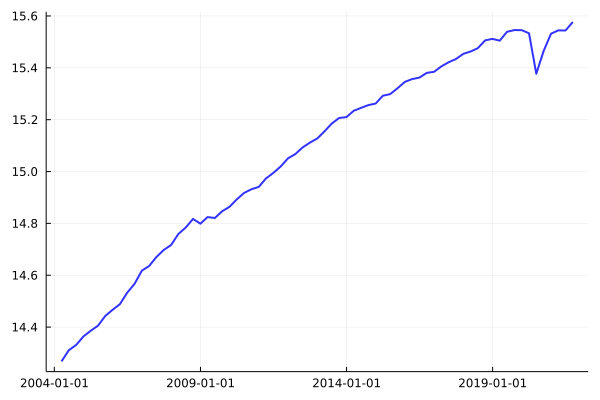

In [27]:
plot(date_sa, log.(gdp), legend = false, lw = 2, color = :blue, alpha = 0.8)

## Plotting the data (inflation)

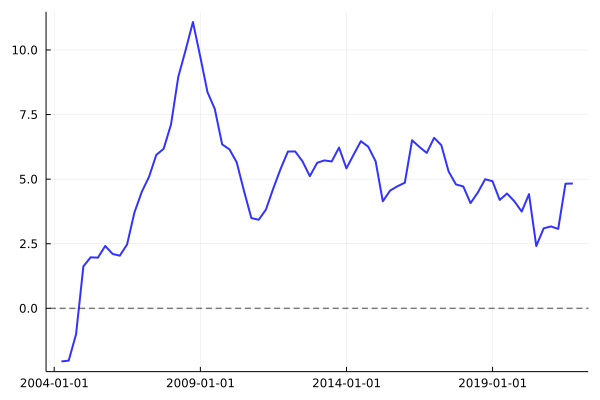

In [43]:
inflation = sa_data[!, :inflation]
plot(date_sa, inflation, legend = false, lw = 2, color = :blue, alpha = 0.8)
plot!([0], legend = false, lw = 1.5, seriestype = :hline, color = :black, ls = :dash, alpha = 0.5)

## Plotting the data (inflation vs repo)

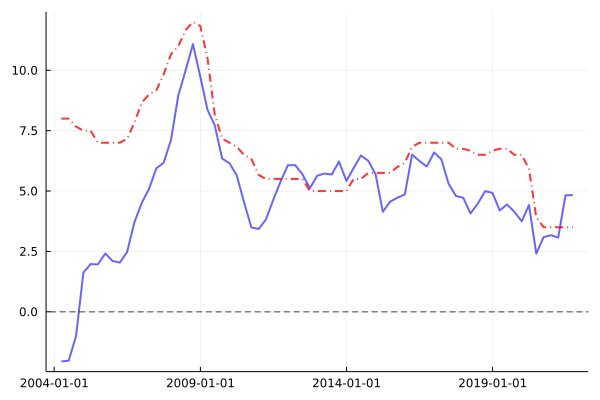

In [52]:
repo = sa_data[!, :repo]
plot(date_sa, inflation, legend = false, lw = 2, color = :blue, alpha = 0.6)
plot!(date_sa, repo, legend = false, lw = 2, color = :red, alpha = 0.8, ls = :dashdot)
plot!([0], legend = false, lw = 1.5, seriestype = :hline, color = :black, ls = :dash, alpha = 0.5)

# Descriptive statistics

In [28]:
mean(gdp) # The average

3.7277526338028167e6

In [37]:
std(gdp) # The standard deviation

1.3124105578634653e6

In [36]:
describe(sa_data)

,variable,mean,min,median,max,nmissing,eltype
,Symbol,Union…,Any,Any,Any,Int64,DataType
1,date,,2004-03-31,2012-12-31,2021-09-30,0,Date
2,gdp,3.72775e6,1571580,3.71359e6,5819983,0,Int64
3,repo,6.73709,3.5,6.66667,12.0,0,Float64
4,cpi,82.2662,51.1689,80.0,122.233,0,Float64
5,inflation,4.83013,-2.05565,4.86163,11.0829,0,Float64


# Histogram

Histogram gives general idea of what the distribution for **inflation** looks like,

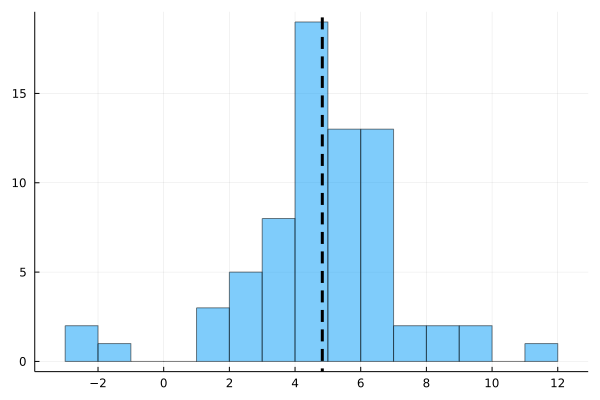

In [41]:
histogram(inflation, legend = false, alpha = 0.5, bins = 20)
plot!([mean(inflation)],  seriestype = :vline, lw = 3, colour = :black, ls = :dash) # plots the mean value

## Growth rates

Computing growth rates is quite important in macroeconomics. 

This is something that you will frequently encounter. 

The growth rate between subsequent two dates can be calculated as follows, 

$$
\left(\frac{Y_{t} - Y_{t-1}}{Y_{t-1}}\right) \times 100 = \left(\frac{Y_{t}}{Y_{t-1}} - 1\right) \times 100 
$$


## Growth rates

The growth rate from one quarter to the same quarter next year is, 

$$
\left(\frac{Y_{t}}{Y_{t-4}} - 1\right) \times 100 
$$

For monthly or quarterly growth rates at an annual rate, 

$$
\left(\left[\frac{Y_{t}}{Y_{t-1}}\right]^{n} - 1\right) \times 100 
$$

where $n = 4$ represents quarterly growth and $n = 12$ gives monthly growth. 

## Growth rates

Let us try calculating some growth rates with the data at hand.

We will focus on GDP growth rates for this example, 

In [53]:
gdp_first = sa_data[1, :gdp]; # first value of the GDP series
gdp_second = sa_data[2, :gdp]; # second value of the GDP series

gdp_growth_1 = ((gdp_second - gdp_first)/gdp_first) * 100 # using the formula for growth between two periods. 

4.414220084246427

## Growth rates

There is an alternative way to calculate an approximation to the growth rate.

We can simply take the natural logarithm of the two values and subtract them from each other. 

In other words we have that, 

$$
\left(\frac{Y_{t}}{Y_{t-1}} - 1\right) \times 100 \approx \log(Y_{t}) - \log(Y_{t-1}) \times 100
$$

In [54]:
(log(gdp_second) - log(gdp_first)) * 100

4.319568788852912

## Functions

A function is a **rule** that assigns to every element of $x \in X$ a **single element** of the set $Y$. 

This is written as, 

$$
f:X \rightarrow Y
$$

When we write $y = f(x)$ we are mapping from the argument $x$ in the domain $X$ to a value in the co-domain $Y$. 

It is important to note that for a function we are assigning a single element from the set $X$ to the set $Y$.

## Functions and non-functions

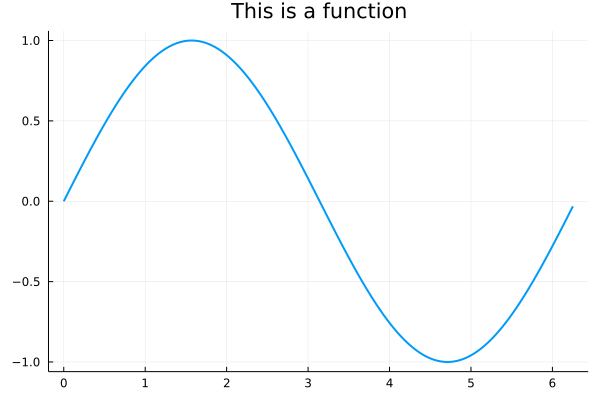

In [55]:
x = 0:π/100:2π
y = sin.(x)

plot(x, y, title = "This is a function", legend = false, lw = 2)

## Functions and non-functions

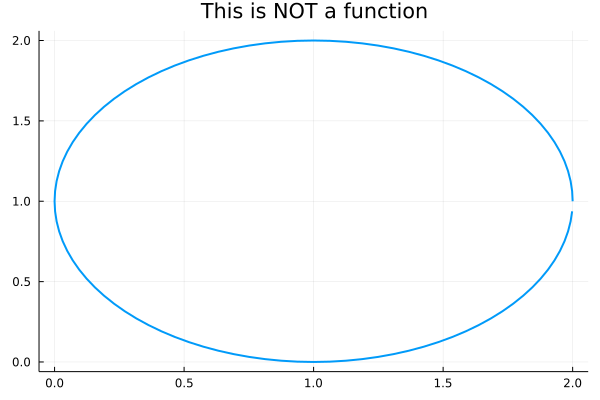

In [57]:
x = 1; y = 1; r = 1
θ = 0:π/50:2π
x_unit = r .* cos.(θ) .+ x
y_unit = r .* sin.(θ) .+ y
plot(x_unit, y_unit, title = "This is NOT a function", legend = false, lw = 2)

## Linear function

In [ ]:
m = 0.5; b = 1;
ar_x = LinRange(-5, 10, 100); ar_y = ar_x .* m .+ b;
plot(ar_x, ar_y, legend = false, title = "Linear function with slope $m and intercept $b", lw = 2)
vline!([0, -2], ls = :dash, color = :black, alpha = 0.5, xticks = ([0, -2]))
hline!([0, 1], ls = :dash, color = :red, alpha = 0.5, yticks = ([0, 1]))

## Local and global maximum

A function $f$ has a global maximum at $x^{*} \in X$ if for all $x \in X$, $f(x) \leq f(x^{*})$. 

A function $f$ has a local maximum at $x^{*} \in X$ if there exists and open interval $(a, b)$ such that $x^{*} \in (a, b)$, and for all $x \in (a, b), f(x) \leq f(x^{*})$. 

Not all functions have a maximum. 

## Local and global maximum

We are going to be dealing with functions such as utility functions, production functions and budget constraints in many of our economics models. 

As an example, in the case of a utility function the household is choosing the bundle of goods that provides the highest level of utility. 

Most production and utility functions will NOT have a local or global maximum. 

In the case of a log-utility function, higher consumption will give higher levels of utility, so no maximum exists here either. 

## Quadratic utility

There is one nice utility function that has a maximum, the quadratic utility function. 

$$
U(x) = x - \alpha \cdot x^2
$$

We can quickly draw a plot of this utility function and by inspection determine where the maximum is going to be.

The most efficient way to determine the maximum would be using a derivative and setting it equal to zero.

However, we haven't introduced derivatives yet, so let us use this inefficient way to determine the maximum for now. 

## Quadratic utility

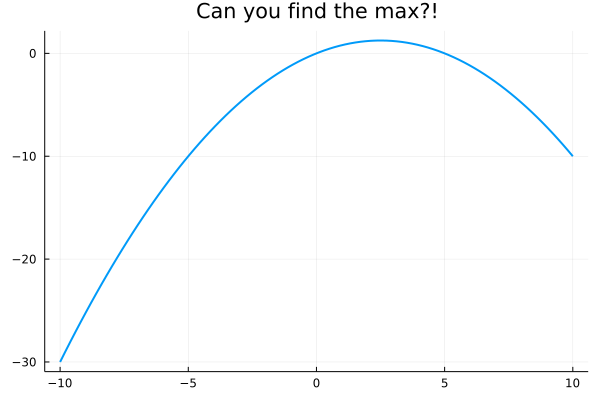

In [5]:
npoints = 100; a, b = (-10, 10); α = 0.2;
x = range(a, b, length = npoints) 
U(x) = x .- α .* x .^ 2
plot(x, U(x), legend = false, lw = 2, title = "Can you find the max?!")

## Quadratic utility

In [7]:
fmax, ix = findmax(U.(x))

(1.249872461993674, 63)

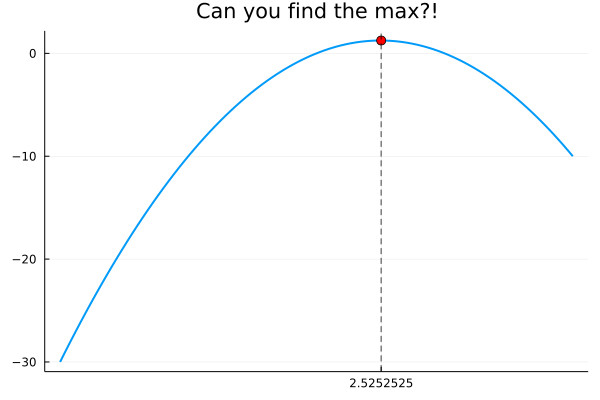

In [10]:
scatter!([x[ix]], [fmax], color = :red, ms = 5)
vline!([x[ix]], lw = 1.5, color = :black, ls = :dash, alpha = 0.5, xticks = ([x[ix]]))

## Derivatives

What is the rate of change for a function as we move along its domain?

The derivative of $f$ at the point $x_0$ is the slope of the tangent line to the graph of $f$ at $(x_0, f(x_0))$.

$$
f'(x_0) = \frac{df(x_0)}{dx} = f_{x}(x_0)
$$

The derivative is defined formally as, 

$$
f'(x_0) = \lim_{h \rightarrow 0} \frac{f(x_{0} + h) - f(x_0)}{h}
$$

## Derivatives

In taking derivatives we normally revert to the derivative rules.

1. Constant rule
2. Power rule
3. Chain rule
4. Sum (difference) rule
5. Product rule
6. Quotient rule (we won't cover this, use product rule instead)

## Derivatives

It is important to note that there are several ways in which you can take derivatives on the computer.

The primary methods are, 

1. Symbolic differentiation
2. Automatic differentiation
3. Numerical differentiation

We will not be going into detail on how these methods work. We will just use them in practice.

## Constant rule

If $f(x) = k$ where $k$ is some constant then $f'(x_0) = 0$.

As an application of the constant rule, let us determine the derivative of $f(x) = 8$. 

$$
f'(x_0) = 0
$$

This is the easiest rule and can be computed in one line. 

Let us see what the computer does with this example.

## Constant rule

In [21]:
@variables x
D = Differential(x)
y = 8
D(y)

Differential(x)(8)

In [22]:
expand_derivatives(D(y))

0

## Power rule

For any positive integer $k$ the derivative of $f(x) = x^{k}$ at $x_0$ is, 

$$
f'(x_0) = k \cdot x_{0}^{k - 1}
$$

Find the derivative for

$$
f(x) = x ^ 3
$$

What do you think the answer should be? Let us check with the computer to see what we get.

## Power rule

In [23]:
y = x ^ 3
D(y)

Differential(x)(x^3)

In [24]:
expand_derivatives(D(y))

3(x^2)

In [25]:
f(x) = x ^ 3
f'(x) 

3(x^2)

## Chain rule

The chain rule is a bit more complicated then some of the other rules, but it is used frequently in economics.

If we have a function $f(x) = p(q(x))$ then the derivative at $x_0$ according to the chain rule is, 

$$
f^{\prime } (x_0 )=p^{\prime } (q(x_0 ))\cdot q^{\prime } (x_0 )
$$

A good example of where this is applicable is the function 

$$
f(x) = \sqrt{(5x - 8)}
$$


## Chain rule

In this case we have a composition of two functions, $p(x) = \sqrt{x}$ and $q(x) = 5x - 8$.

Here we need to take the derivatives separately and combine with our rule.

We start with $p'(x)$.

We haven't really talked about taking the derivative of a square root.

So how do we proceed?

## Chain rule

Well, our square root can actually be written as $p(x)^{1/2}$.

Now we can use our power rule from before to get $p'(x) = \frac{x^{-1/2}}{2}$.

Next we need to take the derivative of $q(x)$.

This gives us $q'(x) = 5$ using the power rule (since $5 = 5 \cdot x^{(1 - 1)}$).

## Chain rule

Now we combine all the components as per the chain rule, 

$$
\begin{align*}
f'\left( x \right) & = p'\left( {q\left( x \right)} \right)\,\,q'\left( x \right)\\ 
&  = p'\left( {5x - 8} \right)\,\,q'\left( x \right)\\ 
&  = \frac{1}{2}{\left( {5x - 8} \right)^{ - \frac{1}{2}}}\,\left( 5 \right)\\ 
&  = \frac{1}{{2\sqrt {5x - 8} }}\,\,\left( 5 \right)\\ 
&  = \frac{5}{{2\sqrt {5x - 8} }}\end{align*}
$$

## Chain rule

In [32]:
y = sqrt(5x - 8)
D(y)

Differential(x)(sqrt(5x - 8))

In [33]:
expand_derivatives(D(y))

(5//2)*(sqrt(5x - 8)^-1)

In [34]:
f(x) = sqrt(5x - 8)
f'(x) 

5 / (2sqrt(5x - 8))

## Sum (difference) rule

Given functions $p$ and $q$ that are differentiable at $x$ and with $f(x) = p(x) + q(x)$ we have that the derivative according to the sum rule is given by, 

$$
f^{\prime } (x)=p^{\prime } (x)+q^{\prime } (x)
$$

Let us consider an example with the application of this rule. 

Find the derivative of $f(x) = 2x^5 + 7$. 

In this case, $p(x) = 2x^5$ and $q(x) = 7$. 

## Sum (difference) rule

$$
\begin{align*} 
f'(x)&=\dfrac{d}{dx}\left(2x^5+7\right)\\
&=\dfrac{d}{dx}(2x^5)+\dfrac{d}{dx}(7) & & \text{Apply sum rule.}\\
&=2\dfrac{d}{dx}(x^5)+\dfrac{d}{dx}(7) & & \text{Apply constant multiple rule.}\\ 
&=2(5x^4)+0 & & \text{Apply power rule and constant rule.}\\
&=10x^4 & & \text{Simplify}. 
\end{align*}
$$

## Sum (difference) rule

In [29]:
y = 2x^5 + 7
D(y)

Differential(x)(7 + 2(x^5))

In [30]:
expand_derivatives(D(y))

10(x^4)

In [31]:
f(x) = 2x^5 + 7
f'(x) 

10(x^4)

## Product rule

Given functions $p$ and $q$ that are differentiable at $x$ and with $f(x)=p(x)\cdot q(x)$ we have that the derivative is, 

$$
f^{\prime } (x)=p^{\prime } (x)\cdot q(x)+p(x)\cdot q^{\prime } (x)
$$

Consider the following example, find derivative of $f(x) = (x^2+2)(3x^3−5x)$ by applying the product rule. 

## Product rule

First, set $p(x)=x2+2$ and $q(x)=3x3−5x$.

Then $p'(x)=2x$ and $q'(x)=9x2−5$ and therefore, 

$$
f'(x)=p'(x)q(x)+q'(x)p(x)=(2x)(3x^3−5x)+(9x^2−5)(x^2+2)
$$

If we simplify this we have $f'(x) = 15x4+3x2−10$

## Product rule

In [35]:
y = (x^2 + 2)*(3x^3 − 5x)
D(y)

Differential(x)((2 + x^2)*(3(x^3) - 5x))

In [36]:
expand_derivatives(D(y))

(2 + x^2)*(9(x^2) - 5) + 2x*(3(x^3) - 5x)

In [37]:
f(x) = (x^2 + 2)*(3x^3 − 5x)
f'(x) 

2x*(3(x^3) - 5x) + 3(x^2)*(6 + 3(x^2)) - 10 - 5(x^2)

## Exponential

The exponential function is used a lot in economics. 

We will often have functions such as $f(x) = \exp(a \cdot x)$. 

The derivative in this case is given by, 

$$
f'(x) = a \cdot \exp(a \cdot x)
$$


## Logarithm

Finally, we have the derivative of a log function, which is used almost everywhere in economics. 

If we have the function $f(x) = \log(x)$ then the derivative is given by, 

$$
f'(x) = 1 / x
$$

## Higher order derivatives

With these rules you should be able to tackle most problems that involve derivatives.

These derivatives that we calculated were first order derivatives.

We can actually take the derivative again with respect to the variable of interest and then we would have **second order derivatives**. 

The second order derivative is then a derivative of the first order derivative. 

While the first order derivative provides a rate of change (often a slope of a tangent line), the second order derivative gives us information on the rate of change of the rate of change. 

## Conditions for local maxima

Previously we looked at the definitions for global and local maxima.

In the univariate case the first and second order necessary condition for a local maxima is the following,  

1. **FONC:** $f'(x^*) =0$
2. **SONC** $f''(x^*) \leq 0$ (and $f''(x^*) \geq 0$ for local minima)
2. (**SOSC** $f''(x^*) < 0$ (and $f''(x^*) > 0$ for local minima))

## Local maxima

An easier way to determine the turning points for functions to use the first and second order conditions.

Say that we want to determine the minima and maxima of the following function,

$$
f(x) = 200 - 30x + 8x^2 - 1/2x^3
$$

How would we do this? 

First let us plot the function to see what it looks like. 

## Function plot

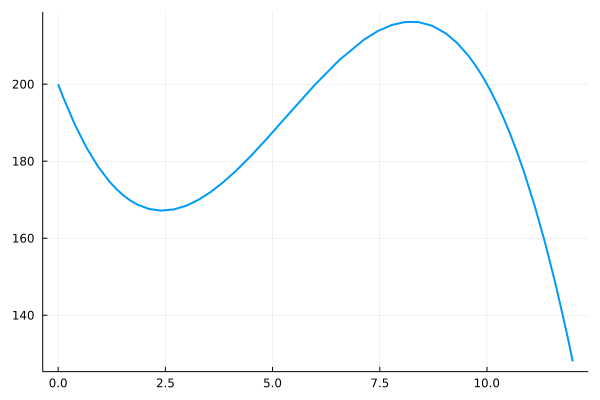

In [38]:
f(x) = 200 - 30 * x + 8 * x^2 - 0.5 * x^3
plot(f, 0, 12, lw = 2, legend = false)

## Local maxima

It appears from the graph that there are going to be two turning points.

We want to calculate the local maximum in the interval $[0, 12]$.

First we take the first order condition to find the place where the slope is zero.

Then we look at the second order condition to determine if it is a maximum or minimum.

For this we are going to be using a root finding package in Julia, called `Roots`.

## Local maxima

In [39]:
roots = find_zeros(f', (0, 12)) # we are essentially setting f'(x) = 0 with this package. 

2-element Vector{Float64}:
 2.427400704306218
 8.239265962360449

In [43]:
f''(roots[1]), f''(roots[2])

(8.717797887081346, -8.717797887081346)

This first value is positive, so we don't believe that this is a maximum.  

The second value is negative, so we believe that the second turning point is our maximum. 

## Function plot

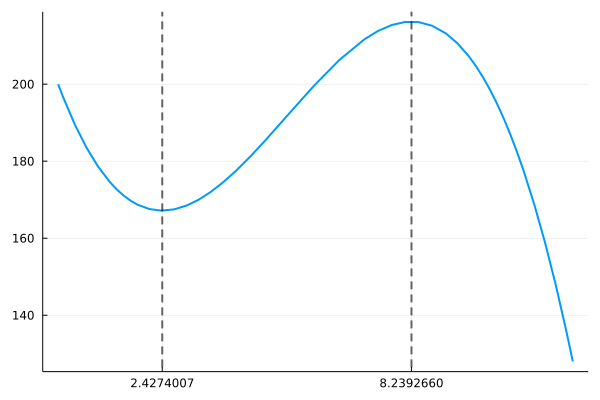

In [40]:
plot(f, 0, 12, lw = 2, legend = false)
vline!([roots[1], roots[2]], lw = 2, alpha = 0.6, ls = :dash, color = :black, xticks = ([roots[1], roots[2]]))

## Functions of multiple variables

Here we talk about how to deal with functions $f: \mathbb{R}^{n} \rightarrow \mathbb{R}$. 

This means functions that take values in $\mathbb{R}^n$ and return a value along the real line.

An example of this would be, 

$$
f(x, y) = x^{2} + y^{2}
$$

This is a function that takes in two inputs and returns one output.

We will mostly be working with functions that have two inputs.

## Surface plot

In [45]:
function minmax()
	
	v = collect(range(-2, stop = 2, length = 30))  # values
	mini = [x^2 + y^2 for x in v, y in v]
	maxi = -mini   # max is just negative min
	saddle = [x^2 + y^3 for x in v, y in v]
	
	return Dict(:x => v,:min => mini, :max => maxi, :saddle => saddle)
end;

function mmplotter(s::Symbol)
	
    d = minmax()

    surface(d[:x], d[:x], d[s], fillalpha = 0.7, legend = false, fillcolor =:viridis)
end;

function mmcontour(s::Symbol)
	
    d = minmax()

    contour(d[:x], d[:x], d[s], fillalpha = 0.5, legend = false, fill = true, fillcolor = :viridis, color = :black)
end;

The following provides the plot for the function $f(x, y) = x^{2} + y^{2}$.

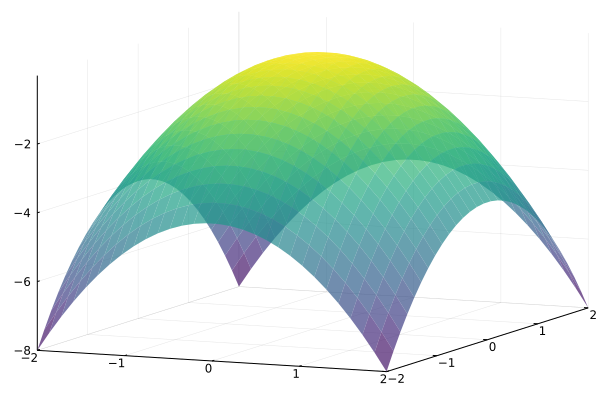

In [46]:
mmplotter(:max)

## Contour plot

Below is a contour plot, which shows a top down view of the surface plot above. 

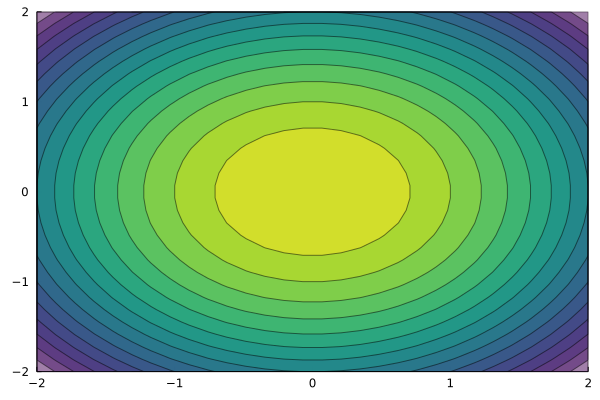

In [47]:
mmcontour(:max)

## Partial derivatives

For a function $f: \mathbb{R}^{n} \rightarrow \mathbb{R}$ the concept of a derivative is extended to partial derivatives for $n$ variables.

The partial of $x$ is defined by holding $y$ constant while a derivative in $x$ is taken.  

The partial derivative of a function $f$ with respect to the variable $x$, can be written as $\frac{\partial{f}}{\partial{x}}$, which is defined as,

$$
\dfrac{∂f}{∂x}=f_x(x,y)=\lim_{h→0}\dfrac{f(x+h,y)−f(x,y)}{h}
$$

## Partial derivatives

$$
\dfrac{∂f}{∂x}=f_x(x,y)=\lim_{h→0}\dfrac{f(x+h,y)−f(x,y)}{h}
$$

In this definition we see a new symbol, $\partial$, which indicates a partial derivative.

In this case we can also write the derivative with respect to $y$ so there are two partial derivatives for this function, since it is a function of two variables. 

The gradient of $f$, which is referred to as $\nabla f$, is the vector valued function of partial derivatives $[\partial f / \partial x, \partial f / \partial y]$.

## Partial derivatives

Let us look at an example. 

Say that we wanted to calculate the partial derivative for some function,

$$
f(x,y)=x^2−3xy+2y^2−4x+5y−12
$$

The easiesy way to take a partial derivative of $f$ with respect to $x$ would be to treat the variable $y$ like it was a constant and apply the usual single variable calculus rules. 

## Partial derivatives

Let us consider the individual components of the function. 

In the case of $x^{2}$, we would have that the derivative is $2x$. 

For $-3xy$ we treat the $y$ like a constant, so the derivative is $-3y$.

The next term, $2y^2$ falls away completely since it is constant. The same is true for $5y$ and $12$.

Finally, we are left with $-4x$, with a derivative given by $-4$. 

If we then add these components together, we get our answer $2x - 3y - 4$

## Partial derivatives

In [48]:
@variables x y

l = x^2 − 3x*y + 2y^2 − 4x + 5y − 12

H = Differential(x);
I = Differential(y);

In [49]:
expand_derivatives(H(l)) # partial derivative of f(x, y) wrt to x

2x - 4 - 3y

In [50]:
expand_derivatives(I(l)) # partial derivative of f(x, y) wrt to y

5 + 4y - 3x